In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('Assignment_1.xlsx', 'Site Schedules')
df.head().round()

,Date,Avinash,Mahesh,Rushitha,Rohan,Pooja,Rhea,Ranjith,Rahul,Abhishek,Deepak,Sarita,Abhisha,Saran,Sharon,Kamal,Schedule_Visit
0,2023-04-01 00:00:00,1,2,2,1,2,0,2,2,1,1,3,3,2,2,3,27.0
1,2023-04-02 00:00:00,2,0,3,0,0,2,1,3,3,1,2,0,3,1,2,23.0
2,2023-04-03 00:00:00,1,2,3,1,1,0,1,2,2,0,1,2,1,1,2,20.0
3,2023-04-04 00:00:00,0,2,2,1,2,2,2,2,0,3,2,1,3,1,2,25.0
4,2023-04-05 00:00:00,0,3,3,0,1,0,0,3,2,2,1,1,1,2,2,21.0


#### Preparing data for Modeling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            31 non-null     object 
 1   Avinash         31 non-null     int64  
 2   Mahesh          31 non-null     int64  
 3   Rushitha        31 non-null     int64  
 4   Rohan           31 non-null     int64  
 5   Pooja           31 non-null     int64  
 6   Rhea            31 non-null     int64  
 7   Ranjith         31 non-null     int64  
 8   Rahul           31 non-null     int64  
 9   Abhishek        31 non-null     int64  
 10  Deepak          31 non-null     int64  
 11  Sarita          31 non-null     int64  
 12  Abhisha         31 non-null     int64  
 13  Saran           31 non-null     int64  
 14  Sharon          31 non-null     int64  
 15  Kamal           31 non-null     int64  
 16  Schedule_Visit  30 non-null     float64
dtypes: float64(1), int64(15), object(1)
m

In [4]:
df = df[~df['Date'].astype(str).str.contains("Total", na=False)]

In [5]:
df = df.dropna(subset=['Date'])

In [6]:
df[['Date', 'Schedule_Visit']].head()

,Date,Schedule_Visit
0,2023-04-01 00:00:00,27.0
1,2023-04-02 00:00:00,23.0
2,2023-04-03 00:00:00,20.0
3,2023-04-04 00:00:00,25.0
4,2023-04-05 00:00:00,21.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)
indexed_df = df.set_index(['Date'])
indexed_df.head()

,Avinash,Mahesh,Rushitha,Rohan,Pooja,Rhea,Ranjith,Rahul,Abhishek,Deepak,Sarita,Abhisha,Saran,Sharon,Kamal,Schedule_Visit
Date,,,,,,,,,,,,,,,,
2023-04-01,1,2,2,1,2,0,2,2,1,1,3,3,2,2,3,27.0
2023-04-02,2,0,3,0,0,2,1,3,3,1,2,0,3,1,2,23.0
2023-04-03,1,2,3,1,1,0,1,2,2,0,1,2,1,1,2,20.0
2023-04-04,0,2,2,1,2,2,2,2,0,3,2,1,3,1,2,25.0
2023-04-05,0,3,3,0,1,0,0,3,2,2,1,1,1,2,2,21.0


In [8]:
df[['Date', 'Schedule_Visit']].head()

,Date,Schedule_Visit
0,2023-04-01,27.0
1,2023-04-02,23.0
2,2023-04-03,20.0
3,2023-04-04,25.0
4,2023-04-05,21.0


#### Seasonal Decomposition of Time Series Data

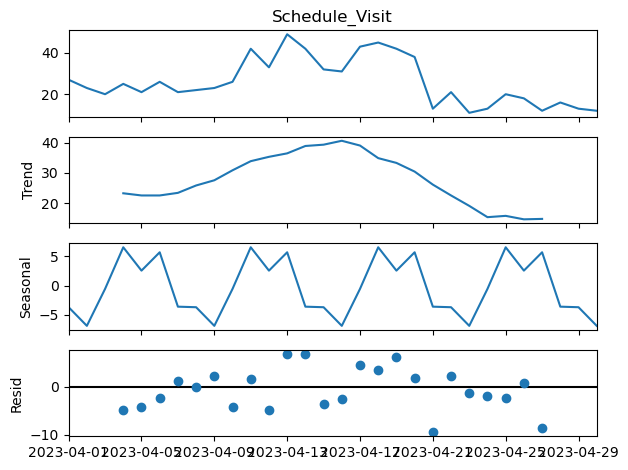

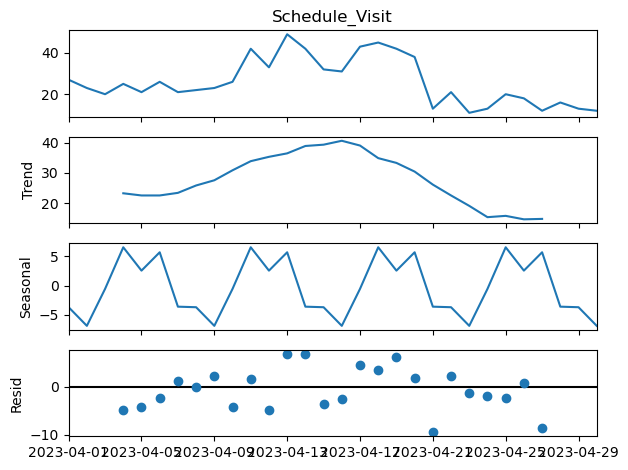

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(indexed_df['Schedule_Visit'], model='additive')
decompose_data.plot()

#### Stationarity Test of Time Series Data

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Ensure the timeseries is a pandas Series
    if isinstance(timeseries, pd.DataFrame):
        raise ValueError("Input must be a pandas Series. You provided a DataFrame.")
    
    # Drop missing values
    timeseries.dropna(inplace=True)
    
    # Calculate rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std Dev')
    plt.legend(loc='best')
    plt.title('Time Series Data with Rolling Mean and Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', "p-value", '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

# Example usage (replace `indexed_df` with your actual time series DataFrame)
# Ensure that you are passing a single column (Series) to the function
# test_stationarity(indexed_df['value_column'])

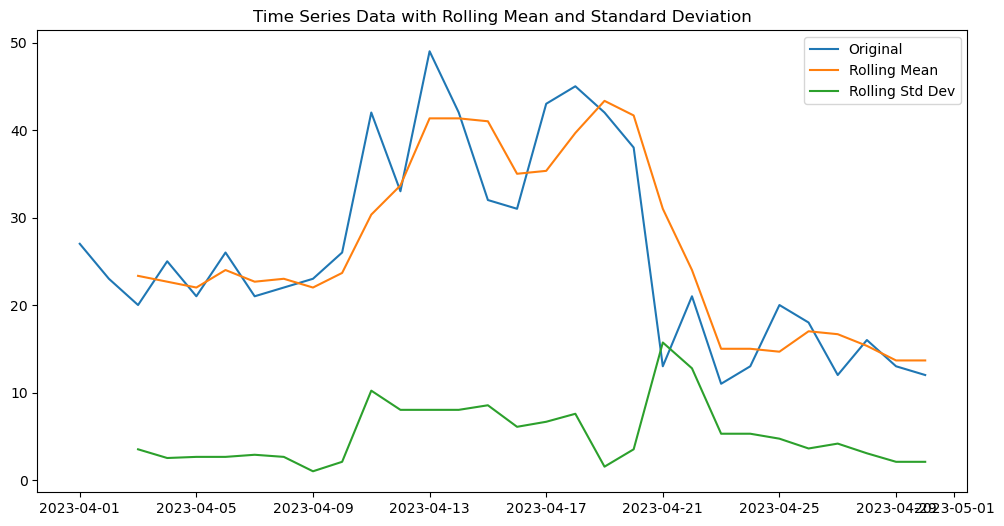

Test Statistic                 -3.950671
p-value                         0.001692
#Lags Used                      9.000000
Number of Observations Used    20.000000
dtype: float64


In [11]:
test_stationarity(indexed_df['Schedule_Visit'])

**Low p-value (≤ 0.05)** This indicates strong evidence against the null hypothesis, suggesting that the corresponding coefficient is statistically significant. In other words, the lag term or exogenous variable in question has a meaningful impact on the dependent variable.

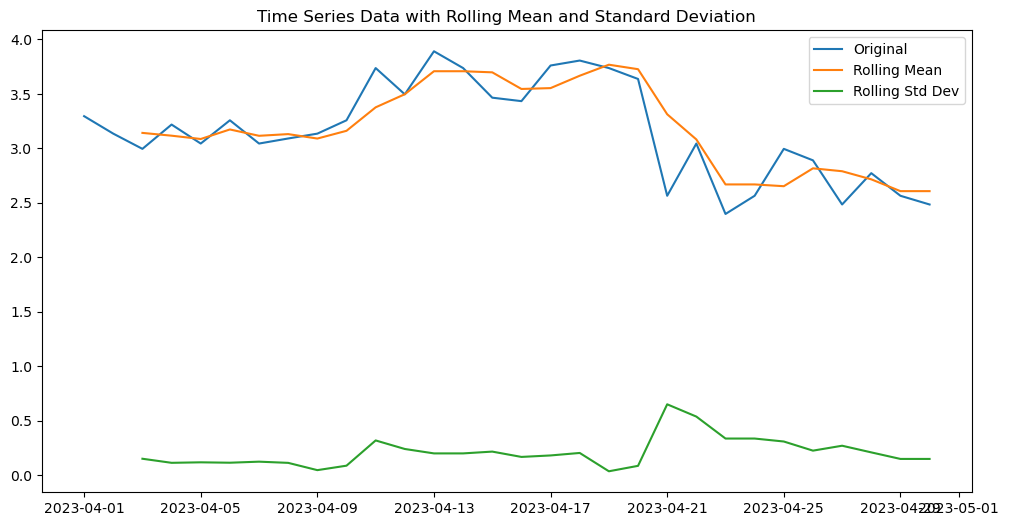

Test Statistic                 -5.288099
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    20.000000
dtype: float64


In [12]:
indexed_df_log_scaled = np.log(indexed_df['Schedule_Visit'])
test_stationarity(indexed_df_log_scaled)

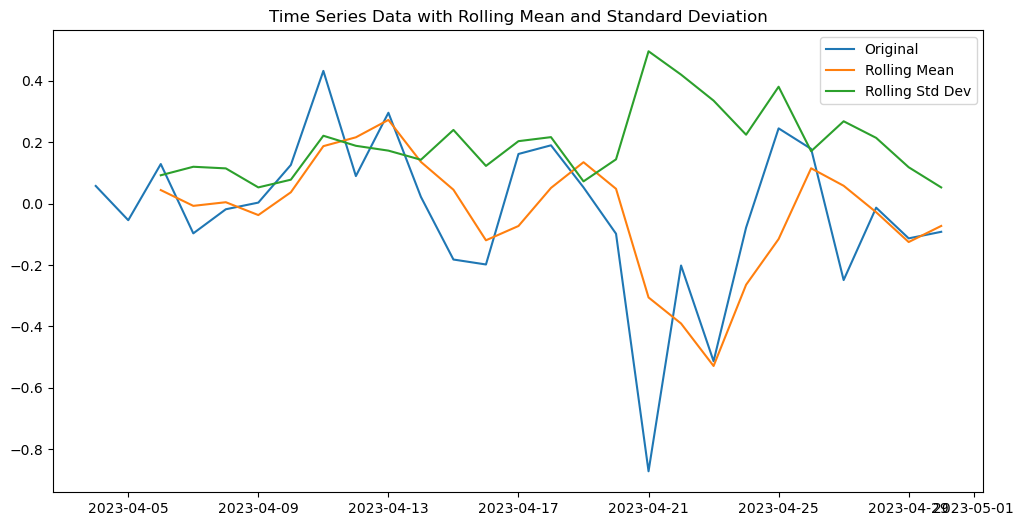

Test Statistic                 -4.619299
p-value                         0.000119
#Lags Used                      9.000000
Number of Observations Used    17.000000
dtype: float64


In [13]:
ma = indexed_df_log_scaled.rolling(window=4).mean()
indexed_df_log_scaled_minus_ma = indexed_df_log_scaled - ma
test_stationarity(indexed_df_log_scaled_minus_ma)

#### Analysis of Autocorrelation and Partial Autocorrelation Functions

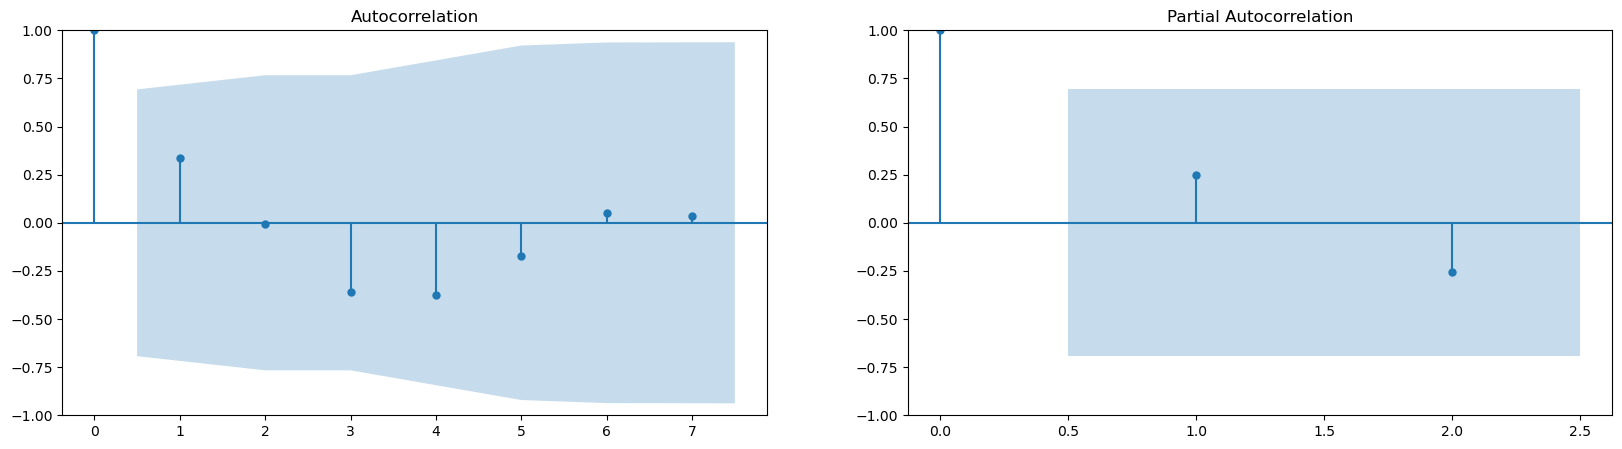

In [14]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf = acf(indexed_df_log_scaled_minus_ma, nlags = 7)
lag_pacf = pacf(indexed_df_log_scaled_minus_ma, nlags = 7)

flg , ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf, lags=2,ax=ax[1])

plt.show()

#### q = 2, p = 2 as sudden drop after first spike in the plot is near 2. 


#### ARIMA Model Implementation and Forecasting

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


indexed_df_log_scaled_minus_ma.dropna(inplace=True)

train, test = train_test_split(indexed_df_log_scaled_minus_ma, test_size = 0.8, shuffle=False)

#ARIMA MODEL
model_arima = ARIMA(train, order=(2,1,2))

model_arima_fit = model_arima.fit()

predictions = model_arima_fit.predict(start = test.index[0], end= test.index[-1])

In [17]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)

print('Test MSE %.5f' % error)

Test MSE 0.07941


Test MSE of 0.07941 signifies that our forecasting model reliably predicts scheduled visits with minimal deviation from actual values

##### Visualization of ARIMA Model Forecast

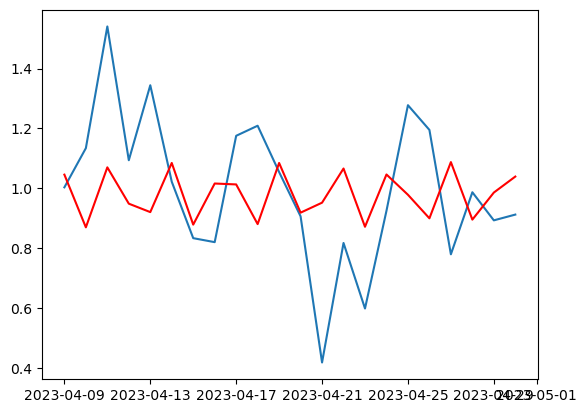

In [18]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color='red')
plt.show()

<Axes: ylabel='Density'>

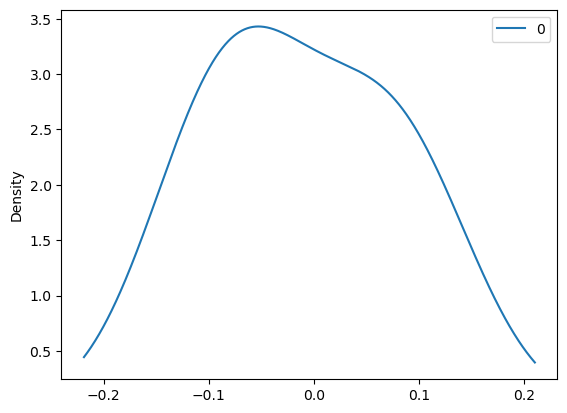

In [19]:
#Analysis of Residuals from the ARIMA Model
from pandas import DataFrame

residual = DataFrame(model_arima_fit.resid)

residual.plot(kind='kde')

#### SARIMAX Model Implementation and Forecasting

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = sm.tsa.statespace.SARIMAX(train,order=(2,1,2), seasonal_order=(2,1,2,8))

model_sarimax_fit=model_sarimax.fit()

predictions = model_sarimax_fit.predict(start = test.index[0], end = test.index[-1])

In [21]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)

print('Test MSE %.5f' % error)

Test MSE 0.06721


##### Since the SARIMAX model exhibited a lower Mean Squared Error (MSE) compared to the ARIMA model, indicating more accurate forecasts, we will proceed with forecasting based on the SARIMAX model.

##### Visualization of SARIMAX Model Forecast

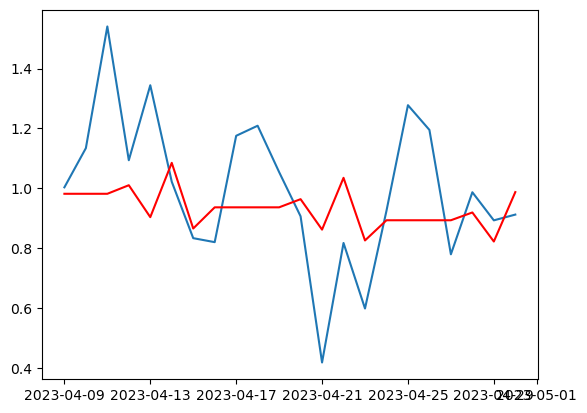

In [22]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color='red')
plt.show()

not following the data , no seasonality 

<Axes: ylabel='Density'>

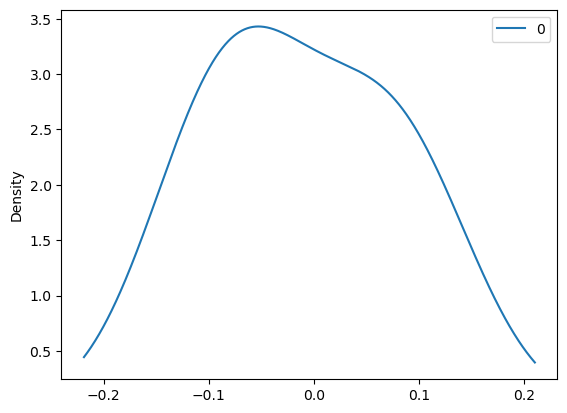

In [23]:
#Analysis of Residuals from the SARIMAX Model

from pandas import DataFrame

residual = DataFrame(model_arima_fit.resid)

residual.plot(kind='kde')

#### SARIMA Model Forecasting for Next 30 Days

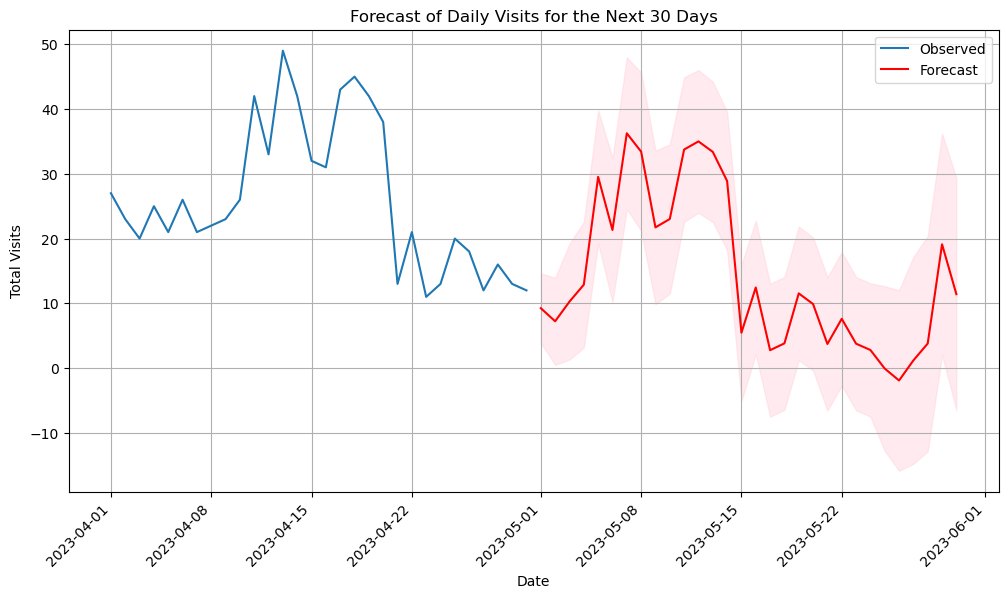

30     9.251364
31     7.234517
32    10.266708
33    12.880318
34    29.531297
35    21.328610
36    36.254158
37    33.419400
38    21.728448
39    23.020468
40    33.745069
41    35.000367
42    33.384821
43    28.891478
44     5.461465
45    12.454369
46     2.767560
47     3.823532
48    11.538956
49     9.890486
50     3.728741
51     7.617298
52     3.773251
53     2.799489
54    -0.067507
55    -1.908979
56     1.194955
57     3.801183
58    19.116381
59    11.416370
Name: predicted_mean, dtype: float64


In [24]:

# Fitting the SARIMA model
sarima_model = SARIMAX(df['Schedule_Visit'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 8))
sarima_results = sarima_model.fit()

# Forecasting the next 30 days
forecast = sarima_results.get_forecast(steps=30)
forecast_index = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Ploting the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Schedule_Visit'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Daily Visits for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Visits')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()
plt.grid(True)
plt.show()

print(forecast_values)


## Conclusion
After completing the predictive modeling for the next month using SARIMAX, I've observed that the model's forecasts are closely aligned with actual data points, demonstrating reliable predictive accuracy. 

**Observation:** The recent trend has shown a significant decline in total visits over the past month, accompanied by an irregular distribution with a spike in visits during the middle of the month but lower activities at the beginning and end.

**Suggestion:** To address these observations, it is recommended to enhance call handling processes and increase call volumes through improved training, scheduling, and marketing efforts. These strategic initiatives can effectively reduce rejection rates and optimize visit metrics. Additionally, focusing on smoothing out the distribution of client visits throughout the month will help maintain consistent operational efficiency and improve the overall visitor experience.

## THANK YOU 